## Importing all the libraries.

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statistics as stat
import datetime as dt
import pycountry as pc
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

## Loading data.

In [103]:
data = pd.read_csv(r"C:\Users\Akshay Deshmukh\Desktop\Data Science\Portfolio\EDA projects\Covid-19 EDA\COvid-19 clinical trials\COVID clinical trials.csv")

## Exploring the Data

In [104]:
data.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [106]:
Null_Values=pd.DataFrame()
Null_Values['Features']=data.columns

null_count=[]
unique_count=[]

for i in data.columns:
    null_count.append(data[i].isnull().sum())
    unique_count.append(len(data[i].unique()))

Null_Values['Unique Value Count']=unique_count
Null_Values['Null Count']=null_count
Null_Values.style.background_gradient(subset=['Null Count'],axis=None)

,Features,Unique Value Count,Null Count
0,Rank,5783,0
1,NCT Number,5783,0
2,Title,5775,0
3,Acronym,2339,3303
4,Status,12,0
5,Study Results,2,0
6,Conditions,3067,0
7,Interventions,4338,886
8,Outcome Measures,5688,35
9,Sponsor/Collaborators,3631,0


Observations:

1. Data consists of 27 variables with 5783 datapoints.


2. All the variables in the Data except for Enrollment are of type object.


3. The columns "Rank" and "NCT numbers" have all unique values.


4. Columns "Results first posted" and "Study Documents" have more than 90% null values present in it.


5. "Acronyms" and "Intervention" also have large number of null values present in it.

## Research status

In [78]:
trial_summary = pd.DataFrame(data.Status.value_counts())
trial_summary['Percentage']= trial_summary['Status'].apply(lambda x: x*100/sum(trial_summary['Status']))
trial_summary

,Status,Percentage
Recruiting,2805,48.504237
Completed,1025,17.724365
Not yet recruiting,1004,17.361231
"Active, not recruiting",526,9.095625
Enrolling by invitation,181,3.129863
Withdrawn,107,1.850251
Terminated,74,1.279613
Suspended,27,0.466886
Available,19,0.328549
No longer available,12,0.207505


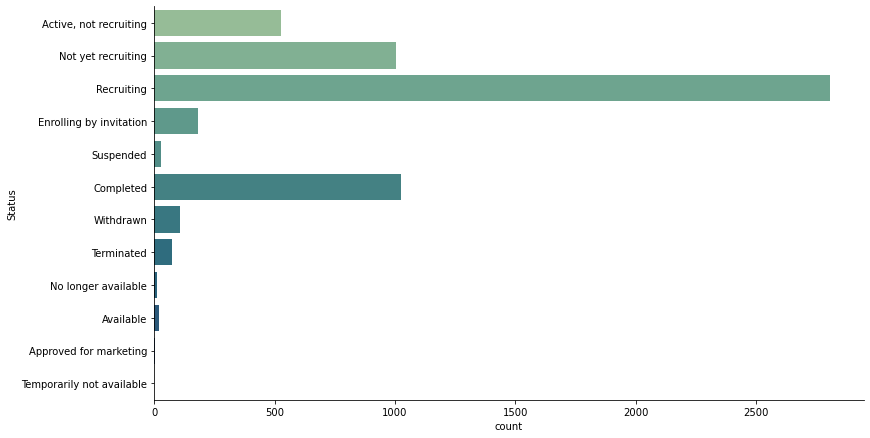

In [79]:
sns.catplot(y="Status", kind='count',data=data ,height=6, aspect=2, palette="crest")

Observations:

1. 48% of the trials are currently recruting which means they are actively proceeding in their studies and might require more professionals for their studies.


2. 17% of the studies are already completed.


3. And 17% of the studies are not yet recruting meaning they are still in prilliminary stages


4. Other stages are the studies include "Withdrawn", "Terminated", "Active, not recruting" etc.

## Research Conditions

In [80]:
data['Conditions']=data['Conditions'].str.lower()

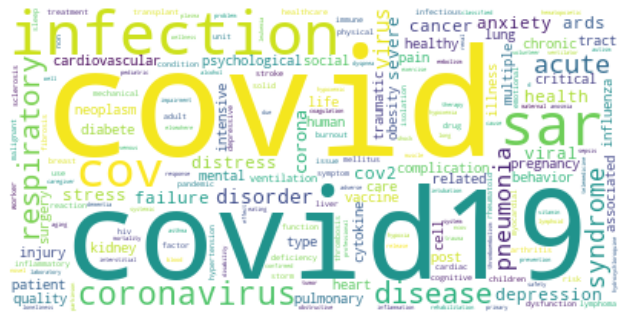

In [81]:
fig, ax = plt.subplots(figsize=(11,6))
text = " ".join(i for i in data['Conditions'])
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Observations:

1. Covid-19, sar, pneumonia are the major keywords found in the Conditons columns which indicates majority of the reasearch's were conducted on Covid-19 virus.


2. Some other reasearch's were conducted on topics likes cancer, cardiovascular diseases, pregnancy etc.

## Study results

In [107]:
data['Study Results'].value_counts()

No Results Available    5747
Has Results               36
Name: Study Results, dtype: int64

<AxesSubplot:xlabel='Study Results', ylabel='count'>

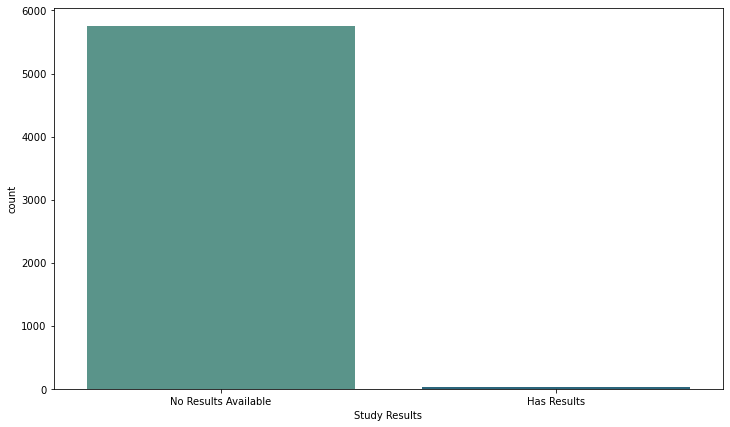

In [83]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(data['Study Results'], ax=ax ,palette="crest")

Observations:

1. Only 36 research's have posted or shown any results which indicate that most of the trials are yet to find their desired results. 

## Sponsors.

In [84]:
top_10_sponsors = pd.DataFrame(data['Sponsor/Collaborators'].value_counts().head(10))
top_10_sponsors

,Sponsor/Collaborators
Assistance Publique - Hôpitaux de Paris,78
Assiut University,57
"University Hospital, Strasbourg, France",40
"University Hospital, Montpellier",34
Hospices Civils de Lyon,31
Cairo University,27
"University Hospital, Toulouse",24
"University Hospital, Lille",23
Centre Hospitalier Universitaire de Nice,21
Tanta University,21


<AxesSubplot:xlabel='Sponsor/Collaborators'>

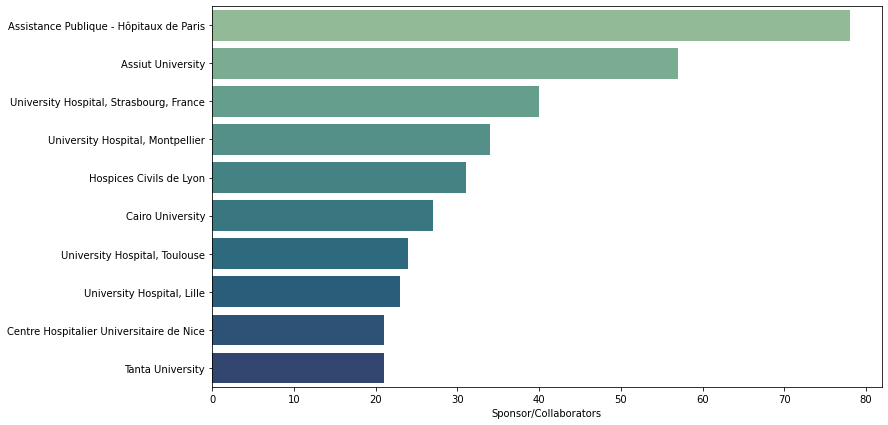

In [85]:
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(y=top_10_sponsors.index,x = 'Sponsor/Collaborators', data=top_10_sponsors, palette="crest")

Observations:

1. Assistance Publique - Hôpitaux de Paris was the major sponsor by sponsoring 78 reasearch's.


2. Majority of the the sponsors belonged to european countires which indicates the huge contribution of european countries in fighting Covid-19. 

## Demograpics

In [86]:
data['Age']=data['Age'].apply(lambda x: re.sub(r"\([^()]*\)", "", x)).str.lower()

In [87]:
data['Age'].value_counts()

18 years and older           2885
child, adult, older adult     486
18 years to 80 years          221
18 years to 65 years          155
18 years to 75 years          135
                             ... 
18 years to 48 years            1
3 years to 13 years             1
24 years to 60 years            1
7 years to 12 years             1
9 months and older              1
Name: Age, Length: 417, dtype: int64

In [88]:
data['Gender'].value_counts()

All       5567
Female     162
Male        44
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x24624f7ed00>,
 [Text(-1.6396431024689722, 0.1845819507046247, 'All'),
  Text(1.6347538612605528, -0.22378519408958517, 'Female'),
  Text(1.6495270329841385, -0.03950401820758374, 'Male')],
 [Text(-0.8943507831648937, 0.10068106402070436, '96.43'),
  Text(0.8916839243239377, -0.12206465132159187, '2.81'),
  Text(0.8997420179913481, -0.021547646295045672, '0.76')])

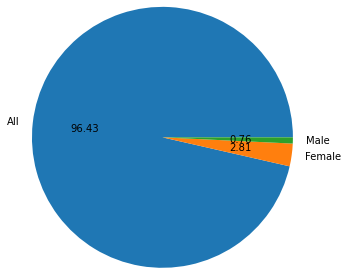

In [89]:
plt.pie(data['Gender'].value_counts(), labels=['All','Female','Male'], autopct='%.2f', radius=1.5)
# sns.countplot(data['Gender'], palette="ch:.25")

<AxesSubplot:>

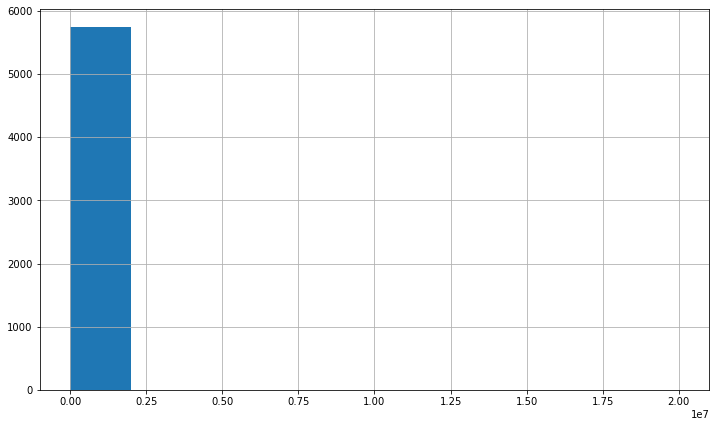

In [90]:
fig, ax = plt.subplots(figsize=(12,7))
data['Enrollment'].hist()

Observations:

1. Majority of the Studies have people from the age group of 18 years and older.


2. 96.43 % for the Studies had people from every gender.


3. Only 2.81% of research's had only female candidates and only 0.76% research's were conducted on only male candidates.


4. Most studies had 0-50k participants.


5. Some research's also had participants upto 10M.

# Phase analysis

<AxesSubplot:xlabel='Phases', ylabel='count'>

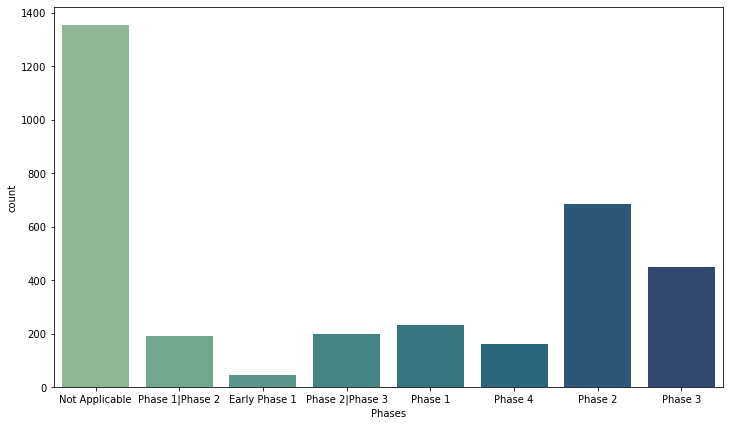

In [91]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(data['Phases'], ax=ax, palette="crest")

Observation:

1. The most important takeaway is that a large percentage of studies (378) are in the second phase.


2. There are 77 studies in the third phase.


3. There are 72 studies in the fourth phase meaning they are very close to reaching a solution.


4. Majority Studies have Not Applicable Phase

# Funding analysis

In [92]:
data['Funded Bys'].value_counts()

Other                          4488
Industry                        651
Other|Industry                  216
Industry|Other                  190
Other|NIH                        97
NIH                              51
Other|U.S. Fed                   25
U.S. Fed                         15
Industry|U.S. Fed                10
NIH|Industry                      6
NIH|Other                         5
U.S. Fed|Other                    5
Industry|U.S. Fed|Other           3
Other|Industry|NIH                2
Industry|Other|NIH                2
Industry|NIH|Other                2
NIH|Other|U.S. Fed|Industry       2
Other|NIH|Industry                2
Industry|NIH                      2
Other|NIH|U.S. Fed                2
NIH|Other|Industry                2
NIH|Industry|Other                1
Other|U.S. Fed|Industry           1
Industry|Other|U.S. Fed           1
Industry|U.S. Fed|NIH             1
Other|U.S. Fed|NIH                1
Name: Funded Bys, dtype: int64

In [93]:
fed_counter=0
NIH_counter=0
both=0
Fundedby_gov=[]
for i in data['Funded Bys']:
    if 'U.S. Fed' in i and 'NIH' in i:
        both+=1
    elif 'U.S. Fed' in i:
        fed_counter+=1
    elif 'NIH' in i:
        NIH_counter+=1
        
print('{}: {} \n'.format('Research funded by the U.S Fed', fed_counter) +
      '{}: {} \n'.format('Research funded by the NIH', NIH_counter)+ 
      '{}: {} \n'.format('Research funded by both NIH and U.S Fed', both))

Research funded by the U.S Fed: 60 
Research funded by the NIH: 172 
Research funded by both NIH and U.S Fed: 6 



Observation:

1. Majority of the Research haven't disclosed their funding.


2. For researches who have disclosed their funding, maximum of them have recieved it from the industry.


3. Many studies have also been financed by the National Institute of Health and the US Federal Reserve.

# Study type analysis

In [94]:
data['Study Type'].value_counts()

Interventional                                                         3322
Observational                                                          2427
Expanded Access:Intermediate-size Population                             15
Expanded Access:Treatment IND/Protocol                                    8
Expanded Access:Intermediate-size Population|Treatment IND/Protocol       5
Expanded Access:Individual Patients                                       3
Expanded Access:Individual Patients|Intermediate-size Population          1
Expanded Access                                                           1
Expanded Access:Individual Patients|Treatment IND/Protocol                1
Name: Study Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Study Type'>

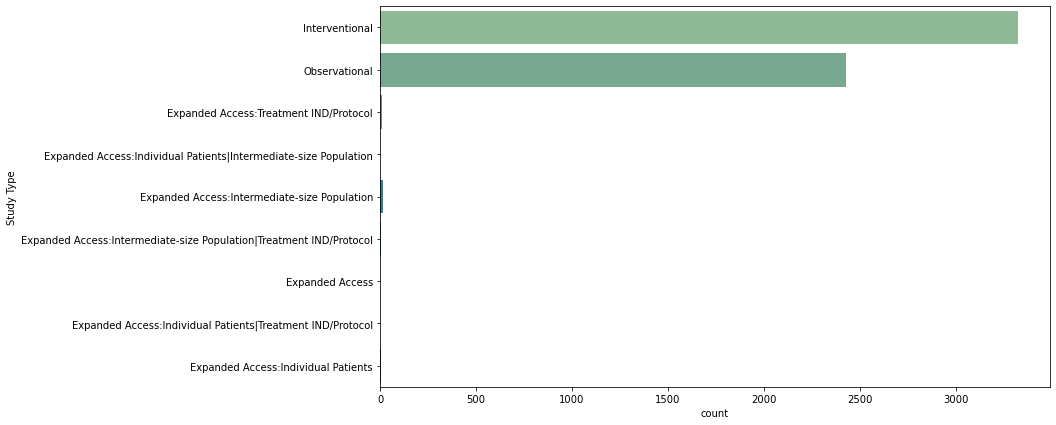

In [95]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(y=data['Study Type'], ax=ax, palette="crest")

Observations:

1. Expanded Access Methods are rarely used in studies.


2. The majority of studies are observational and interventional in nature.
 

# Research time analysis

In [108]:
data.iloc[:, 18:24] = data.iloc[:, 18:24].apply(pd.to_datetime)
data['Start Date'] = data['Start Date'].dt.to_period('M')
data['Completion Date'] = data['Completion Date'].dt.to_period('M')

In [111]:
start_date=pd.DataFrame(data['Start Date'].value_counts().head(10)).reset_index()
start_date.columns=['Start Date','count']

<AxesSubplot:xlabel='Start Date', ylabel='count'>

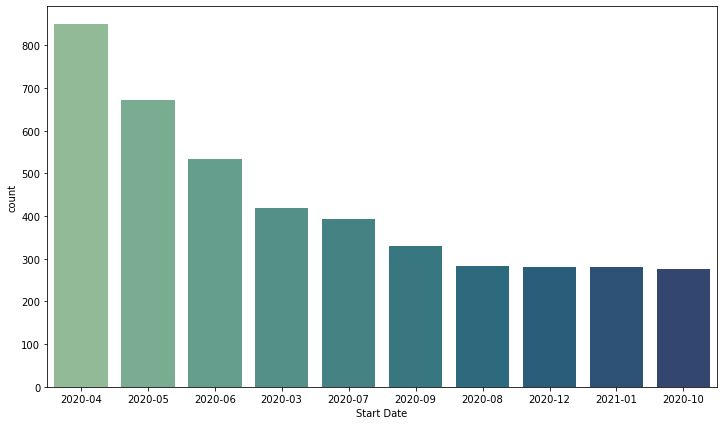

In [98]:
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(x= 'Start Date', y='count', data=start_date, ax=ax, palette="crest")

<AxesSubplot:xlabel='Completion Date', ylabel='count'>

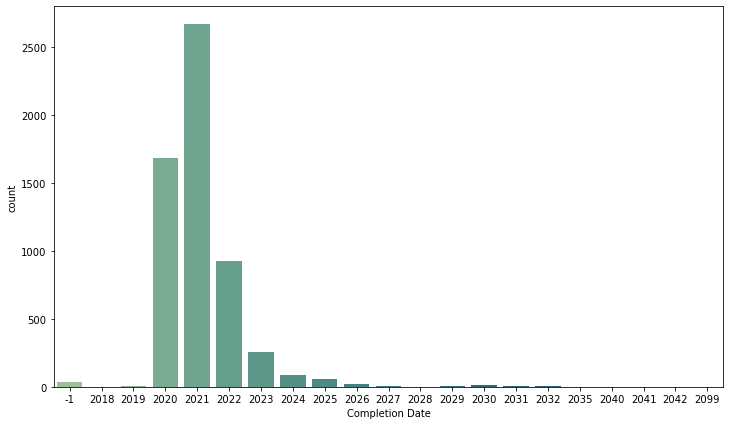

In [99]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(data['Completion Date'].dt.year, ax=ax,palette="crest" )

Observation:

1. Majority of the studies being conducted air to complete their research between 2020 and 2026.


2. Some studies state that they will be completed in 2099, 2030, 2031 etc , which appears to be the outlairs.

# Research Loactions analysis

In [100]:
temp=[]
for i in data["Locations"]:
    temp_1=[]
    for j in pc.countries:
        if j.name in str(i):
            temp_1.append(j.name)
    temp.append(temp_1)
temp=[' '.join([j for j in i]) for i in temp]
data['Country of Research'] = temp

<AxesSubplot:xlabel='Country', ylabel='No.of Research'>

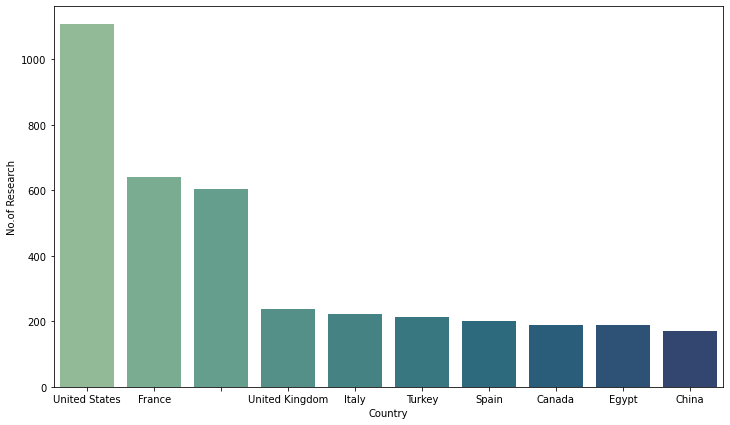

In [101]:
country_of_research= pd.DataFrame(data['Country of Research'].value_counts().head(10)).reset_index()
country_of_research.columns=['Country', 'No.of Research']
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(x= 'Country', y='No.of Research', data=country_of_research, ax=ax, palette="crest")

Observation:

1. Most of studies are being carried out in the United states of America.


2. Other Than USA, france is leading in Covid-19 research.

# Final Summary

1. Majority of the studies being conducted air to complete their research between 2020 and 2026.


2. The majority of studies are observational and interventional in nature.


3. For researches who have disclosed their funding. Maximum of them have recieved it from the industry. The NIH and the U.S fedral reserve are also funding many researchs.


4. Another important takeaway is that a large percentage of studies (378) are in the second phase and 72 studies are in phase 4


5. Majority of the Studies have people from the age group of 18 years and older.


6. Assistance Publique - Hôpitaux de Paris was the major sponsor by sponsoring 78 reasearch's.


7. Only 36 research's have posted or shown any results which indicate that most of the trials are yet to find their desired results.


8. 48% of the trials are currently recruting which means they are actively proceeding in their studies and might require more professionals for their studies.


9. Most of studies are being carried out in the United states of America. Other Than USA, france is leading in Covid-19 research.